# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.datasets import fetch_openml

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

2024-11-22 22:16:16.003423: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-22 22:16:16.115992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-22 22:16:16.166147: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-22 22:16:16.180173: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-22 22:16:16.286784: I tensorflow/core/platform/cpu_feature_guar

## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [2]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    weights = np.random.randn(input_size, hidden_size) * .1
    biases = np.zeros(hidden_size)
    weights_output = np.random.randn(hidden_size, output_size) * .1
    biases_output = np.zeros(output_size)
    return {'W1': weights, 'b1': biases, 'W2': weights_output, 'b2': biases_output}



TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [3]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return np.where(x < 0, 0, 1)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    x = np.clip(x, -500, 500)
    return 1 / (1+np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1-sigmoid_x)


TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [4]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    A1 = np.dot(X, parameters['W1']) + parameters['b1']
    Z1 = relu(A1)
    A2 = np.dot(Z1, parameters['W2']) + parameters['b2']
    Z2 = sigmoid(A2)
    cache = {'A1': A1, 'Z1': Z1, 'A2': A2, 'Z2': Z2}
    return Z2, cache


TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [5]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    m = y_true.shape[0]
    epsilon = 1e-10
    # y_pred = np.clip(y_pred, epsilon, 1-epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / m
    return loss


TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [6]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    m = X.shape[0]
    dA2 = cache['Z2'] - y_true
    dW2 = np.dot(cache['Z1'].T, dA2) / m
    db2 = np.sum(dA2, axis=0) / m
    dZ1 = np.dot(dA2, parameters['W2'].T)
    dA1 = dZ1 * relu_derivative(cache['A1'])
    dW1 = np.dot(X.T, dA1) / m
    db1 = np.sum(dA1, axis=0) / m
    gradients = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    return gradients


TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [7]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    parameters['W1'] -= learning_rate * gradients['dW1']
    parameters['b1'] -= learning_rate * gradients['db1']
    parameters['W2'] -= learning_rate * gradients['dW2']
    parameters['b2'] -= learning_rate * gradients['db2']
    return parameters


TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [8]:
# Training Loop
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    for _ in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)
        loss_history.append(loss)
        if _ % 10 == 0:
            print(f'Epoch {_}, Loss: {loss:.4f}')

for hidden_size in [32, 64, 128]:
    print(f'Training with hidden size: {hidden_size}')
    train_model(x_train.reshape(-1, 784), y_train, hidden_size)
    print()


Training with hidden size: 32
Epoch 0, Loss: 0.7678
Epoch 10, Loss: 1.4179
Epoch 20, Loss: 1.8719
Epoch 30, Loss: 2.0180
Epoch 40, Loss: 2.0356

Training with hidden size: 64
Epoch 0, Loss: 0.6265
Epoch 10, Loss: 1.3290
Epoch 20, Loss: 1.7779
Epoch 30, Loss: 1.9022
Epoch 40, Loss: 1.8963

Training with hidden size: 128
Epoch 0, Loss: 0.8682
Epoch 10, Loss: 1.8236
Epoch 20, Loss: 1.8855
Epoch 30, Loss: 1.7924
Epoch 40, Loss: 1.6825



TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [9]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    t = 0
    v = {key: np.zeros_like(value) for key, value in parameters.items()}
    s = {key: np.zeros_like(value) for key, value in parameters.items()}
    return v, s, t


def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1
    for k in parameters.keys():
        v[k] = beta1*v[k] + (1-beta1) * gradients[f'd{k}']
        s[k] = beta2*s[k] + (1-beta2) * (gradients[f'd{k}']**2)
        v_corrected = v[k] / (1-beta1**t)
        s_corrected = s[k] / (1-beta2**t)
        parameters[k] -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)
        return parameters, v, s, t


TODO: Implement Adam optimizer into the training loop.

In [10]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    v, s, t = initialize_adam(parameters)
    loss_history = []
    for _ in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        loss_history.append(loss)
        if _ % 10 == 0:
            print(f'Epoch {_}, Loss: {loss:.4f}')

for hidden_size in [32, 64, 128]:
    print(f'Training with hidden size: {hidden_size}')
    train_model_with_adam(x_train.reshape(-1, 784), y_train, hidden_size)
    print()


Training with hidden size: 32
Epoch 0, Loss: 0.6214
Epoch 10, Loss: 0.8770
Epoch 20, Loss: 1.0783
Epoch 30, Loss: 1.2021
Epoch 40, Loss: 1.2518

Training with hidden size: 64
Epoch 0, Loss: 0.7797
Epoch 10, Loss: 1.5973
Epoch 20, Loss: 1.9104
Epoch 30, Loss: 1.6198
Epoch 40, Loss: 1.2901

Training with hidden size: 128
Epoch 0, Loss: 0.8129
Epoch 10, Loss: 1.9153
Epoch 20, Loss: 1.2576
Epoch 30, Loss: 0.9080
Epoch 40, Loss: 0.8996



### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [11]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    return {k: np.zeros_like(v) for k, v in parameters.items()}

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for k in parameters.keys():
        s[k] = beta*s[k] + (1-beta) * gradients[f'd{k}']**2
        parameters[k] -= learning_rate * gradients[f'd{k}'] / (np.sqrt(s[k]) + epsilon)
    return parameters, s


TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [12]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    v, s, t = initialize_adam(parameters)
    # if optimizer == 'adam':
    #     v, s, t = initialize_adam(parameters)
    if optimizer == 'rmsprop':
        s = initialize_rmsprop(parameters)
    loss_history = []
    for _ in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        if optimizer == 'adam':
            parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        elif optimizer == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate)
        loss_history.append(loss)
        if _ % 10 == 0:
            print(f'Epoch {_}, Loss: {loss:.4f}')
    return loss_history


TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

Training with Adam optimizer...
Epoch 0, Loss: 0.7963
Epoch 10, Loss: 1.3587
Epoch 20, Loss: 1.5635
Epoch 30, Loss: 1.2773
Epoch 40, Loss: 1.0444

Training with RMSprop optimizer...
Epoch 0, Loss: 0.7849
Epoch 10, Loss: 1.4349
Epoch 20, Loss: 1.1861
Epoch 30, Loss: 1.0015
Epoch 40, Loss: 0.8893


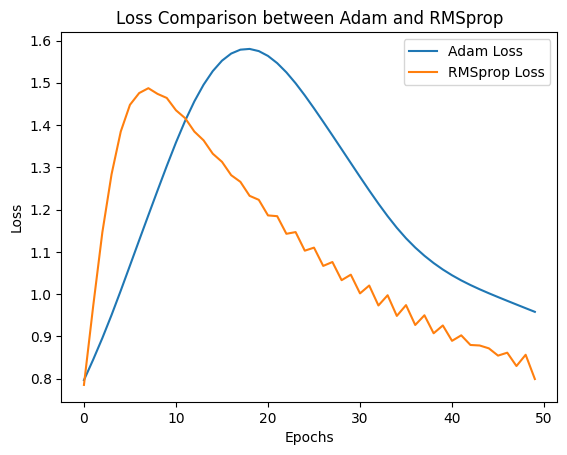

In [13]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    print('Training with Adam optimizer...')
    adam_loss = train_model(X_train, y_train, hidden_size, epochs, optimizer='adam')
    print('\nTraining with RMSprop optimizer...')
    rmsprop_loss = train_model(X_train, y_train, hidden_size, epochs, optimizer='rmsprop')
    plt.plot(adam_loss, label='Adam Loss')
    plt.plot(rmsprop_loss, label='RMSprop Loss')
    plt.grid = True
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Comparison between Adam and RMSprop')
    plt.legend()
    
compare_optimizers(x_train.reshape(-1, 784), y_train, 64)


## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [14]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for k in parameters.keys():
        parameters[k] -= learning_rate * gradients[f'd{k}']
    return parameters


2. Modify the Training Loop


In [20]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    for _ in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        loss_history.append(loss)
        if _ % 10 == 0:
            print(f'Epoch {_}, Loss: {loss:.4f}')
    return loss_history


3. Experiment with Different Learning Rates


Training with learning rate: 0.001
Epoch 0, Loss: 0.8255
Epoch 10, Loss: 0.9242
Epoch 20, Loss: 1.0203
Epoch 30, Loss: 1.1142
Epoch 40, Loss: 1.2054

Training with learning rate: 0.01
Epoch 0, Loss: 0.8405
Epoch 10, Loss: 1.6162
Epoch 20, Loss: 1.8460
Epoch 30, Loss: 1.8492
Epoch 40, Loss: 1.7929

Training with learning rate: 0.1
Epoch 0, Loss: 0.7400
Epoch 10, Loss: 1.6046
Epoch 20, Loss: 1.2307
Epoch 30, Loss: 1.0665
Epoch 40, Loss: 0.9742



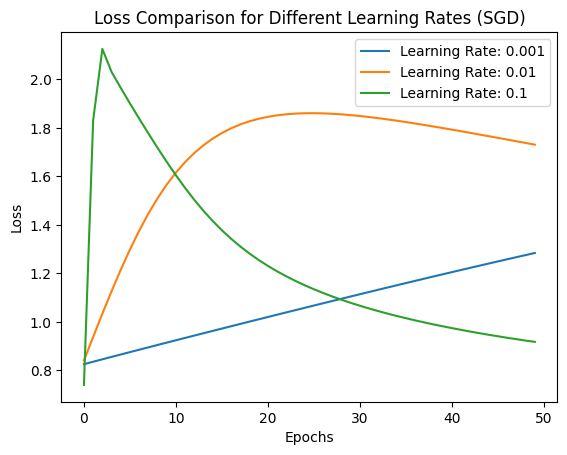

In [21]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    for learning_rate in learning_rates:
        print(f'Training with learning rate: {learning_rate}')
        loss_history = train_model_with_sgd(X_train, y_train, hidden_size, epochs, learning_rate)
        plt.plot(loss_history, label=f'Learning Rate: {learning_rate}')
        print()

        
compare_learning_rates(x_train.reshape(-1, 784), y_train, 64)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison for Different Learning Rates (SGD)')
plt.grid = True
plt.legend()
plt.show()


### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [22]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    return {k: np.zeros_like(v) for k, v in parameters.items()}

def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    for k in parameters.keys():
        v[k] = beta * v[k] + (1-beta) * gradients[f'd{k}']
        parameters[k] -= learning_rate * v[k]
    return parameters, v


3. Modify the Training Loop


In [23]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    if optimizer == 'momentum':
        v = initialize_momentum(parameters)
    loss_history = []
    for _ in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        if optimizer == 'momentum':
            parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)
        elif optimizer == 'sgd':
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        loss_history.append(loss)
        if _ % 10 == 0:
            print(f'Epoch {_}, Loss: {loss:.4f}')
    return loss_history

4. Train the Model with Both Optimizers


Training with Classic SGD...
Epoch 0, Loss: 0.7148
Epoch 10, Loss: 1.6053
Epoch 20, Loss: 1.8328
Epoch 30, Loss: 1.8417
Epoch 40, Loss: 1.7943

Training with SGD with Momentum...
Epoch 0, Loss: 0.6474
Epoch 10, Loss: 1.1344
Epoch 20, Loss: 1.9534
Epoch 30, Loss: 2.3007
Epoch 40, Loss: 2.1382


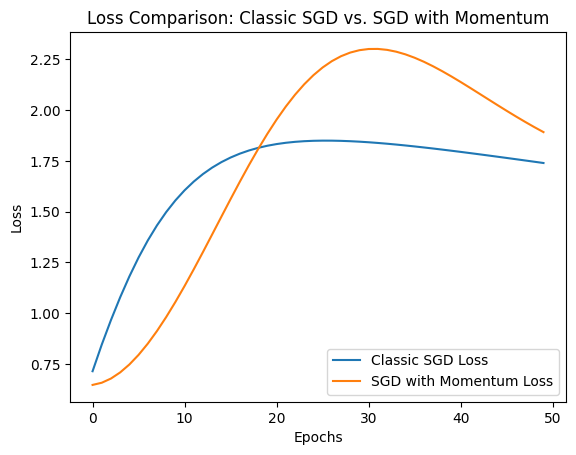

In [24]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    print('Training with Classic SGD...')
    sgd_loss = train_model(X_train, y_train, hidden_size, epochs, optimizer='sgd')
    print('\nTraining with SGD with Momentum...')
    momentum_loss = train_model(X_train, y_train, hidden_size, epochs, optimizer='momentum')
    plt.plot(sgd_loss, label='Classic SGD Loss')
    plt.plot(momentum_loss, label='SGD with Momentum Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Comparison: Classic SGD vs. SGD with Momentum')
    plt.grid = True
    plt.legend()
    plt.show()

compare_sgd_and_momentum(x_train.reshape(-1, 784), y_train, 64)


## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [27]:
def evaluate_accuracy(X_train, y_train, parameters):
    y_pred, _ = forward_propagation(X_train, parameters)
    predictions = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_train, axis=1)
    accuracy = np.mean(predictions == true_labels)
    return accuracy

def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    accuracy_history = []
    for _ in range(epochs):
        epoch_loss = 0
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            y_pred, cache = forward_propagation(X_batch, parameters)
            loss = compute_loss(y_batch, y_pred)
            gradients = backward_propagation(X_batch, y_batch, parameters, cache)
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
            epoch_loss += loss
        # print(gradients)
        loss_history.append(epoch_loss / (X_train.shape[0] // batch_size))
        accuracy = evaluate_accuracy(X_train, y_train, parameters)
        accuracy_history.append(accuracy)
        if _ % 10 == 0:
            print(f'Epoch {_}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
    return loss_history, accuracy_history



2. Train the Model with Different Mini-Batch Sizes


In [28]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    for batch_size in batch_sizes:
        print(f'Training with mini-batch size: {batch_size}')
        train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, batch_size)
        print()
        
compare_mini_batch_sizes(x_train.reshape(-1, 784), y_train, 64)


Training with mini-batch size: 16
Epoch 0, Loss: 3.0138, Accuracy: 0.1000
Epoch 10, Loss: 3.0138, Accuracy: 0.1000
Epoch 20, Loss: 3.0138, Accuracy: 0.1000
Epoch 30, Loss: 3.0138, Accuracy: 0.1000
Epoch 40, Loss: 3.0138, Accuracy: 0.1000

Training with mini-batch size: 32
Epoch 0, Loss: 13.1705, Accuracy: 0.1000
Epoch 10, Loss: 12.5433, Accuracy: 0.1000
Epoch 20, Loss: 11.8809, Accuracy: 0.1000
Epoch 30, Loss: 9.3339, Accuracy: 0.1000
Epoch 40, Loss: 11.6097, Accuracy: 0.1000

Training with mini-batch size: 64
Epoch 0, Loss: 26.8182, Accuracy: 0.1000
Epoch 10, Loss: 28.7134, Accuracy: 0.1000
Epoch 20, Loss: 17.4032, Accuracy: 0.1000
Epoch 30, Loss: 32.7858, Accuracy: 0.1000
Epoch 40, Loss: 22.3014, Accuracy: 0.1000



### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [29]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    return train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, learning_rate, X_train.shape[0])


In [30]:
import time
def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """
    print('Training with Mini-Batch Gradient Descent...')
    start_time = time.time()
    mini_batch_loss, mini_batch_accuracy = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, batch_size)
    mini_batch_time = time.time() - start_time
    print('\nTraining with Full-Batch Gradient Descent...')
    start_time = time.time()
    full_batch_loss, full_batch_accuracy = train_model_full_batch(X_train, y_train, hidden_size, epochs)
    full_batch_time = time.time() - start_time
    
    print(f'Mini-Batch Final Loss: {mini_batch_loss[-1]:.4f}, Final Accuracy: {mini_batch_accuracy[-1]:.4f}, Time: {mini_batch_time:.2f} seconds')
    print(f'Full-Batch Final Loss: {full_batch_loss[-1]:.4f}, Final Accuracy: {full_batch_accuracy[-1]:.4f}, Time: {full_batch_time:.2f} seconds')

compare_mini_batch_and_full_batch(x_train.reshape(-1, 784), y_train, 64)
    

Training with Mini-Batch Gradient Descent...
Epoch 0, Loss: 10.4413, Accuracy: 0.1000
Epoch 10, Loss: 12.5880, Accuracy: 0.1000
Epoch 20, Loss: 9.6913, Accuracy: 0.1000
Epoch 30, Loss: 8.5860, Accuracy: 0.1000
Epoch 40, Loss: 12.3880, Accuracy: 0.1000

Training with Full-Batch Gradient Descent...
Epoch 0, Loss: 0.5663, Accuracy: 0.1640
Epoch 10, Loss: 1.5221, Accuracy: 0.1897
Epoch 20, Loss: 1.8252, Accuracy: 0.2478
Epoch 30, Loss: 1.8461, Accuracy: 0.3127
Epoch 40, Loss: 1.7907, Accuracy: 0.3709
Mini-Batch Final Loss: 6.7461, Final Accuracy: 0.1000, Time: 64.62 seconds
Full-Batch Final Loss: 1.7266, Final Accuracy: 0.4122, Time: 16.52 seconds
